In [29]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf

In [30]:
import os

# Establecer una semilla para reproducibilidad
seed_value = os.getpid()
random.seed(seed_value)        # Semilla para Python
np.random.seed(seed_value)     # Semilla para NumPy
tf.random.set_seed(seed_value) # Semilla para TensorFlow/Keras

In [31]:
def generatePlot(history):
    # Extracción de datos
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Creación del gráfico de accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training')
    plt.plot(epochs, val_acc, 'r', label='Validation')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Creación del gráfico de loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training')
    plt.plot(epochs, val_loss, 'r', label='Validation')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Carga de las muestras de los animales

In [32]:
from keras.preprocessing.image import ImageDataGenerator
import os

image_size = 150
batch_size = 16
rescale_factor = 1./255

# Directorio conjunto entrenamiento
data_dir='./Data/animals'

# Crear un generador para aumentar datos
train_datagen = ImageDataGenerator(
    rescale=rescale_factor,    # Normalizar los valores de los píxeles
    shear_range=0.2,   # Rango para las transformaciones aleatorias
    zoom_range=0.2,    # Rango para el zoom aleatorio
    horizontal_flip=True, # Activar el giro horizontal aleatorio
    validation_split=0.2) # Establecer el porcentaje de imágenes para el conjunto de validación

# Cargar imágenes de entrenamiento
train_generator = train_datagen.flow_from_directory(
    data_dir,      # Directorio con datos
    target_size=(image_size, image_size), # Cambiar el tamaño de las imágenes a 50x50
    batch_size=batch_size,
    class_mode='categorical', # 'binary' para clasificación binaria, 'categorical' para multiclase
    subset='training') # Seleccionar solo el conjunto de entrenamiento

# Cargar imágenes de validación
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # Seleccionar solo el conjunto de validación

Found 8621 images belonging to 6 classes.
Found 2153 images belonging to 6 classes.


In [33]:
model = Sequential()
# Capas convolucionales

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(Dropout(0.2))  # Dropout después de la capa de conv2D
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(Dropout(0.2))  # Dropout después de la capa de conv2D
model.add(MaxPooling2D(pool_size=(2, 2)))


# Agregar más capas convolucionales si es necesario

model.add(Flatten())# Aplanar la salida de la capa convolucional
# Aplanar la salida de la capa convolucional
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))  # Usar 'softmax' para clasificación multi-clase

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 dropout_8 (Dropout)         (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 dropout_9 (Dropout)         (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                 

In [34]:
from keras.callbacks import EarlyStopping

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # 'patience' es el número de épocas sin mejora después de las cuales el entrenamiento se detendrá

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 100

# Entrenar el modelo con Early Stopping
history_of_train = model.fit_generator(
        train_generator,
        epochs=epochs,
        validation_data = validation_generator,
        callbacks = [early_stopping]
        ,steps_per_epoch=200
)

Epoch 1/100


/tmp/ipykernel_23391/2278667360.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_of_train = model.fit_generator(
2023-12-19 02:12:09.864404: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


200/200 [==============================] - 25s 117ms/step - loss: 1.7192 - accuracy: 0.2894 - val_loss: 1.5168 - val_accuracy: 0.4324
Epoch 2/100
200/200 [==============================] - 23s 117ms/step - loss: 1.5538 - accuracy: 0.3779 - val_loss: 1.4554 - val_accuracy: 0.4176
Epoch 3/100
200/200 [==============================] - 23s 113ms/step - loss: 1.4430 - accuracy: 0.4359 - val_loss: 1.3526 - val_accuracy: 0.5151
Epoch 4/100
200/200 [==============================] - 23s 114ms/step - loss: 1.3721 - accuracy: 0.4717 - val_loss: 1.2995 - val_accuracy: 0.5081
Epoch 5/100
200/200 [==============================] - 24s 119ms/step - loss: 1.2898 - accuracy: 0.5025 - val_loss: 1.2062 - val_accuracy: 0.5732
Epoch 6/100
200/200 [==============================] - 23s 113ms/step - loss: 1.2661 - accuracy: 0.5153 - val_loss: 1.2074 - val_accuracy: 0.5704
Epoch 7/100
200/200 [==============================] - 23s 113ms/step - loss: 1.2422 - accuracy: 0.5234 - val_loss: 1.1743 - val_accurac

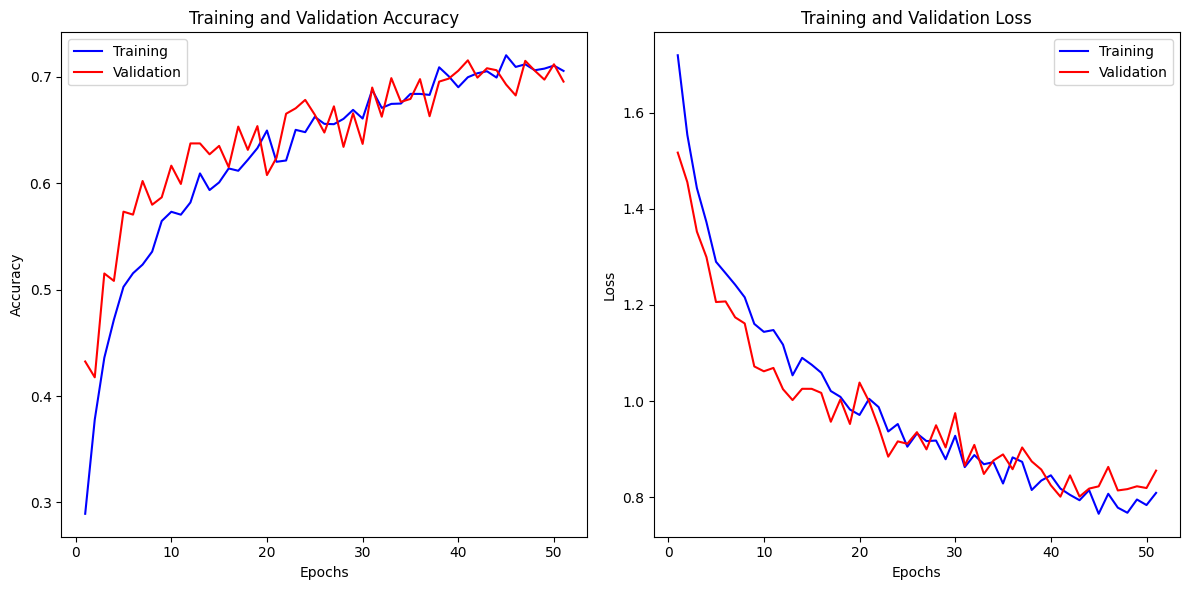

In [36]:
generatePlot(history_of_train) 